In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

This project analyzes airline customer dataset containing **5,000 flight records**. The goal is to extract actionable insights about **customer behavior**, **flight performance**, and **revenue patterns**.

The dataset includes booking and itinerary data: Routes, dates, delay time and cancellations.


Passenger profile: demographics, loyalty tier, historical trips, nationality, booking channel.


Trip context and behavior: ticket class, seat selection, special services(such as meal) and more.



---

# Dataset Overview

Below is the structure of the dataset, showing column names, data types, and completeness:



| #  | Column                  | Non-Null Count | Dtype   |
|----|------------------------|----------------|---------|
| 0  | Customer_ID            | 5000 non-null  | int64   |
| 1  | Age                    | 5000 non-null  | int64   |
| 2  | Gender                 | 5000 non-null  | object  |
| 3  | Nationality            | 5000 non-null  | object  |
| 4  | Loyalty_Status         | 5000 non-null  | object  |
| 5  | Booking_Channel        | 5000 non-null  | object  |
| 6  | Flight_ID              | 5000 non-null  | object  |
| 7  | Route                  | 5000 non-null  | object  |
| 8  | Departure_Date         | 5000 non-null  | object  |
| 9  | Scheduled_Time         | 5000 non-null  | object  |
| 10 | Delay_Minutes          | 5000 non-null  | int64   |
| 11 | Cancellation           | 5000 non-null  | int64   |
| 12 | Ticket_Class           | 5000 non-null  | object  |
| 13 | Base_Ticket_Price_USD  | 5000 non-null  | float64 |
| 14 | Seat_Selection         | 5000 non-null  | object  |
| 15 | Seat_Extra_Charge_USD  | 5000 non-null  | float64 |
| 16 | Pre_Ordered_Meal       | 5000 non-null  | object  |
| 17 | Meal_Revenue_USD       | 5000 non-null  | float64 |
| 18 | Total_Revenue_USD      | 5000 non-null  | float64 |
| 19 | Delay_Group            | 5000 non-null  | object  |



---

# Project Plan & Objectives

My analysis is divided into **three major insight categories**, followed by a combined insight section.

---

## Customer Insights  
**Goal:** Understand who the customers are and how they behave.

**Focus areas:**
- Gender, nationality, and loyalty status distribution  
- Booking channel preferences  
- Age demographics  
- Ticket class and seat/meal behavior  

**Outputs:** Bar charts, pie charts, and frequency distributions.

---

## Flight Insights  
**Goal:** Examine operational performance.

**Focus areas:**
- Delay patterns by time, route, and ticket class  
- Cancellation rates  
- Route popularity and flight frequency  
- Scheduled time behavior (morning, noon, evening, night)

**Outputs:** Histograms, heatmaps, and bar charts.

---

## Revenue Insights  
**Goal:** Analyze revenue generation drivers.

**Focus areas:**
- Ticket class revenue  
- Seat selection and seat upgrade revenue  
- Meal revenue  
- High-spending customer groups  

**Outputs:** Bar charts, boxplots, violin plots, and stacked bars.

---

## Combined Insights (High-Value Segment Analysis)  
**Goal:** Connect customer behavior, flight performance, and revenue.

**Focus areas:**
- High-value customers (Loyalty × Ticket_Class × Total_Revenue_USD)  
- Impact of delays on revenue and add-on purchases  
- Booking channel performance based on revenue  
- Route-level issues (delay/cancellation vs revenue)

**Outputs:** Sunburst chart, scatter plots, correlation heatmap, grouped bar charts.

---

By the end of this project, I aim to:

- Identify the most valuable customer segments  
- Understand operational bottlenecks such as delays and cancellations  
- Reveal key revenue drivers  
- Evaluate booking channel performance  
- Provide actionable insights for improving operations and profitability


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import pickle

import missingno as msno

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
import plotly.graph_objects as go

In [3]:
from pathlib import Path
file_path = Path('/content/drive/My Drive/Colab Notebooks/elbek.csv')

In [4]:
df = pd.read_csv(file_path)
df.head()

,Customer_ID,Age,Gender,Nationality,Loyalty_Status,Booking_Channel,Flight_ID,Route,Departure_Date,Scheduled_Time,Delay_Minutes,Cancellation,Ticket_Class,Base_Ticket_Price_USD,Seat_Selection,Seat_Extra_Charge_USD,Pre_Ordered_Meal,Meal_Revenue_USD,Total_Revenue_USD
0,100000,46,Male,Other,Standard,Online,TG345-0,BKK-SIN,2025-09-29,Morning,6,0,Premium Economy,493.62,Aisle,0.0,Yes,5.73,499.36
1,100001,36,Male,China,Standard,Online,TG774-1,BKK-SIN,2025-09-29,Evening,7,0,Business,741.88,Window,0.0,Yes,7.39,749.27
2,100002,41,Female,Other,Standard,Agent,TG954-2,BKK-SIN,2025-09-29,Evening,11,0,Economy,71.65,Exit Row,0.0,No,0.00,71.65
3,100003,47,Male,Japan,Silver,Online,TG213-3,CNX-DMK,2025-09-29,Noon,18,0,Economy,89.29,Extra Legroom,0.0,No,0.00,89.29
4,100004,39,Male,Thai,Standard,Online,TG893-4,BKK-LHR,2025-09-29,Evening,19,0,Economy,69.70,Aisle,0.0,No,0.00,69.70


In [5]:
df.tail()

,Customer_ID,Age,Gender,Nationality,Loyalty_Status,Booking_Channel,Flight_ID,Route,Departure_Date,Scheduled_Time,Delay_Minutes,Cancellation,Ticket_Class,Base_Ticket_Price_USD,Seat_Selection,Seat_Extra_Charge_USD,Pre_Ordered_Meal,Meal_Revenue_USD,Total_Revenue_USD
4995,104995,63,Female,Other,Standard,Direct,TG893-5,CNX-DMK,2025-09-29,Morning,11,0,Economy,172.45,Extra Legroom,14.29,No,0.00,186.74
4996,104996,32,Female,USA,Silver,Agent,TG664-6,BKK-LHR,2025-09-29,Night,9,0,Premium Economy,272.76,Window,0.00,Yes,7.02,279.78
4997,104997,46,Female,Japan,Standard,Agent,TG224-7,HKT-BKK,2025-09-29,Evening,14,0,Economy,44.00,Extra Legroom,0.00,Yes,10.42,54.42
4998,104998,37,Male,China,Gold,Direct,TG274-8,BKK-SIN,2025-09-29,Night,20,0,Economy,107.20,Middle,0.00,No,0.00,107.20
4999,104999,36,Female,Other,Standard,Agent,TG603-9,BKK-LHR,2025-09-29,Noon,19,0,Economy,147.68,Extra Legroom,8.57,No,0.00,156.25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Nationality            5000 non-null   object 
 4   Loyalty_Status         5000 non-null   object 
 5   Booking_Channel        5000 non-null   object 
 6   Flight_ID              5000 non-null   object 
 7   Route                  5000 non-null   object 
 8   Departure_Date         5000 non-null   object 
 9   Scheduled_Time         5000 non-null   object 
 10  Delay_Minutes          5000 non-null   int64  
 11  Cancellation           5000 non-null   int64  
 12  Ticket_Class           5000 non-null   object 
 13  Base_Ticket_Price_USD  5000 non-null   float64
 14  Seat_Selection         5000 non-null   object 
 15  Seat

In [7]:
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])

In [8]:
df.describe()

,Customer_ID,Age,Departure_Date,Delay_Minutes,Cancellation,Base_Ticket_Price_USD,Seat_Extra_Charge_USD,Meal_Revenue_USD,Total_Revenue_USD
count,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,102499.500000,45.772800,2025-09-29 00:00:00,14.694000,0.020200,379.624904,4.708272,2.383870,386.716736
min,100000.000000,18.000000,2025-09-29 00:00:00,0.000000,0.000000,40.400000,0.000000,0.000000,40.400000
25%,101249.750000,32.000000,2025-09-29 00:00:00,12.000000,0.000000,108.115000,0.000000,0.000000,115.770000
50%,102499.500000,46.000000,2025-09-29 00:00:00,15.000000,0.000000,174.395000,0.000000,0.000000,183.200000
75%,103749.250000,60.000000,2025-09-29 00:00:00,17.000000,0.000000,350.727500,8.570000,5.560000,359.582500
max,104999.000000,74.000000,2025-09-29 00:00:00,34.000000,1.000000,4220.280000,28.570000,11.430000,4229.910000
std,1443.520003,16.445914,NaN,4.398071,0.140698,609.655039,7.446278,3.765582,608.235283


In [9]:
categorical_features = df.select_dtypes(np.object_).columns
categorical_features.tolist()

['Gender',
 'Nationality',
 'Loyalty_Status',
 'Booking_Channel',
 'Flight_ID',
 'Route',
 'Scheduled_Time',
 'Ticket_Class',
 'Seat_Selection',
 'Pre_Ordered_Meal']

In [10]:
numerical_features = df.select_dtypes(np.number).columns
numerical_features.tolist()

['Customer_ID',
 'Age',
 'Delay_Minutes',
 'Cancellation',
 'Base_Ticket_Price_USD',
 'Seat_Extra_Charge_USD',
 'Meal_Revenue_USD',
 'Total_Revenue_USD']

In [11]:
df[numerical_features].describe()

,Customer_ID,Age,Delay_Minutes,Cancellation,Base_Ticket_Price_USD,Seat_Extra_Charge_USD,Meal_Revenue_USD,Total_Revenue_USD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,102499.500000,45.772800,14.694000,0.020200,379.624904,4.708272,2.383870,386.716736
std,1443.520003,16.445914,4.398071,0.140698,609.655039,7.446278,3.765582,608.235283
min,100000.000000,18.000000,0.000000,0.000000,40.400000,0.000000,0.000000,40.400000
25%,101249.750000,32.000000,12.000000,0.000000,108.115000,0.000000,0.000000,115.770000
50%,102499.500000,46.000000,15.000000,0.000000,174.395000,0.000000,0.000000,183.200000
75%,103749.250000,60.000000,17.000000,0.000000,350.727500,8.570000,5.560000,359.582500
max,104999.000000,74.000000,34.000000,1.000000,4220.280000,28.570000,11.430000,4229.910000


### Missing Value Detection

In [12]:
columns_with_missings = df.columns[df.isnull().any()]
columns_with_missings

# no missing values

Index([], dtype='object')

In [13]:
df.columns[df.columns.duplicated()]

# no duplicates

Index([], dtype='object')

<Axes: >

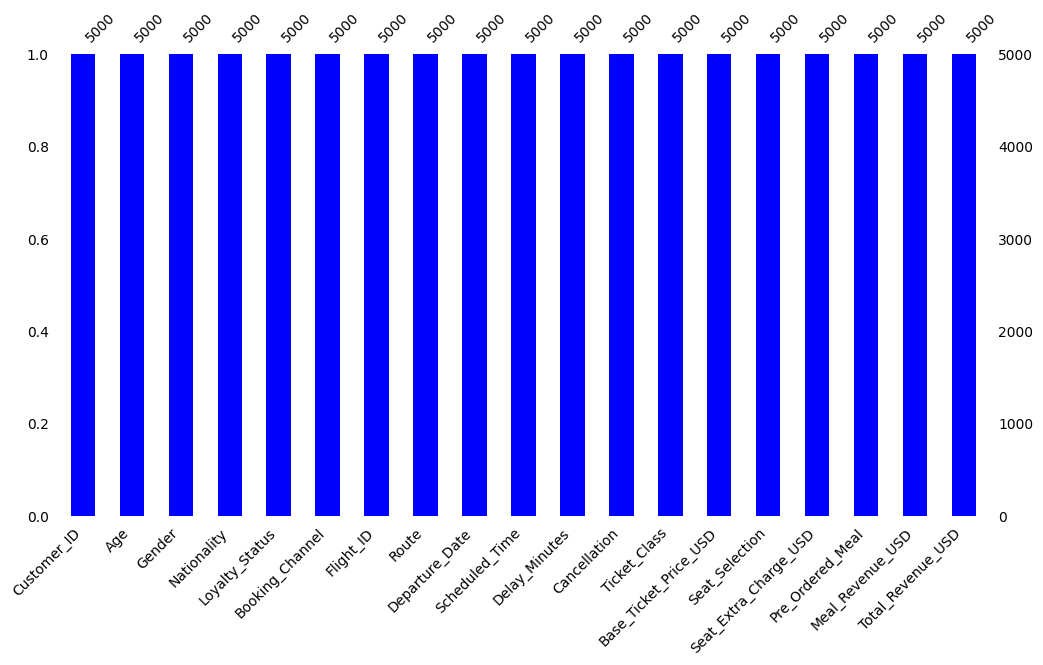

In [14]:
msno.bar(
    df,
    figsize = (12, 6),
    color = 'blue',
    sort = 'ascending',
    fontsize = 10
)

<Axes: >

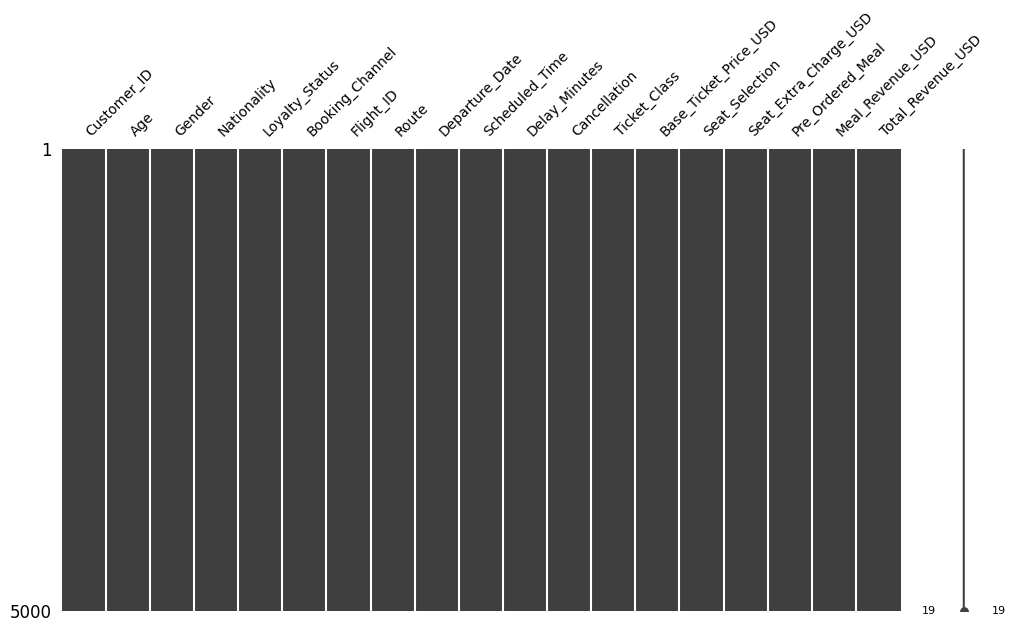

In [15]:
msno.matrix(
    df,
    figsize = (12, 6),
    fontsize = 10
)

---
Based on the above analysis, there are no missing values encountered

---

### Frequency Distributions

In [16]:
#  freq distributions for categorical featrues

for col in categorical_features:
    print(f'Frequency distributions for: {col}')
    print(df[col].value_counts(normalize = True))
    print('------------------------------------')


Frequency distributions for: Gender
Gender
Female    0.5082
Male      0.4428
Other     0.0490
Name: proportion, dtype: float64
------------------------------------
Frequency distributions for: Nationality
Nationality
Other    0.2030
Japan    0.2022
China    0.2006
USA      0.1986
Thai     0.1956
Name: proportion, dtype: float64
------------------------------------
Frequency distributions for: Loyalty_Status
Loyalty_Status
Standard    0.7018
Silver      0.1966
Gold        0.0738
Platinum    0.0278
Name: proportion, dtype: float64
------------------------------------
Frequency distributions for: Booking_Channel
Booking_Channel
Agent     0.3416
Online    0.3358
Direct    0.3226
Name: proportion, dtype: float64
------------------------------------
Frequency distributions for: Flight_ID
Flight_ID
TG369-4    0.0012
TG544-2    0.0012
TG371-4    0.0010
TG332-5    0.0008
TG438-8    0.0008
            ...  
TG796-6    0.0002
TG223-5    0.0002
TG715-4    0.0002
TG955-3    0.0002
TG251-2    0.0002

In [17]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="ticks")

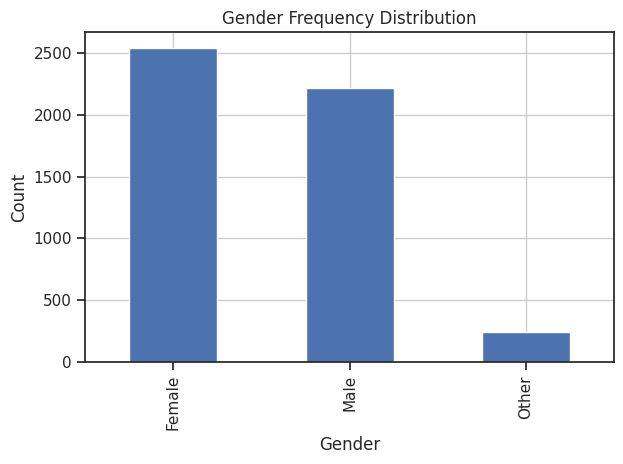

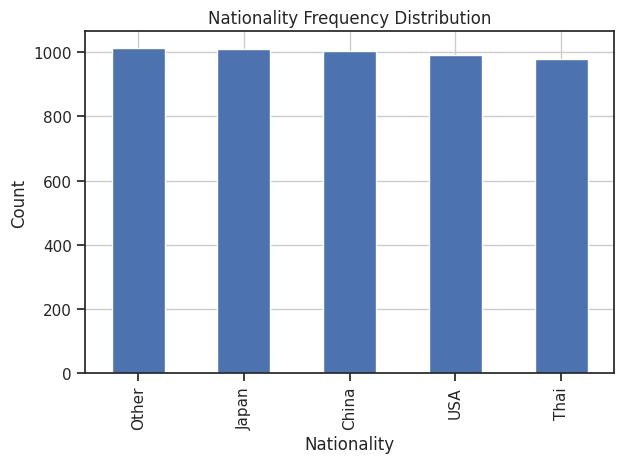

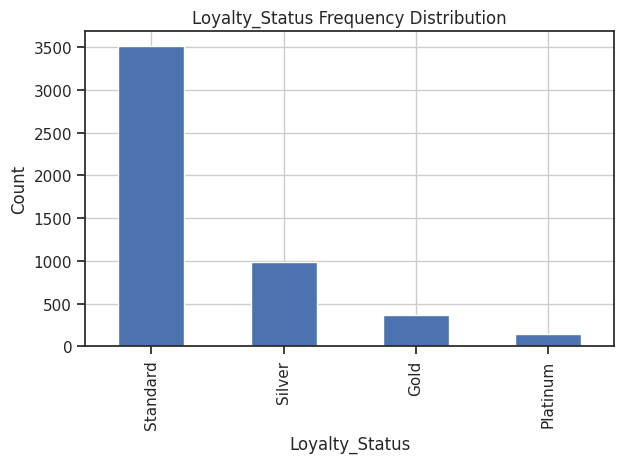

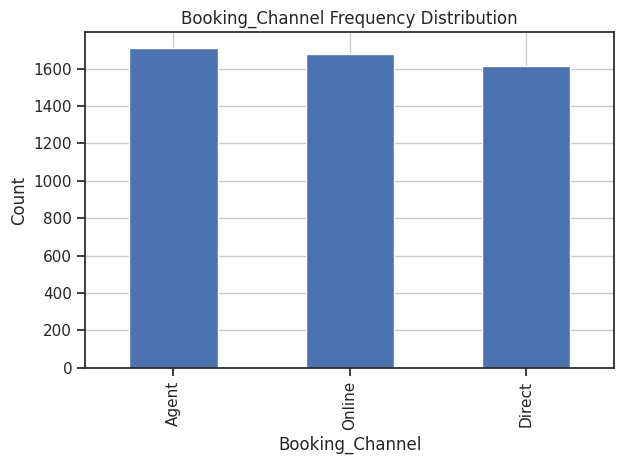

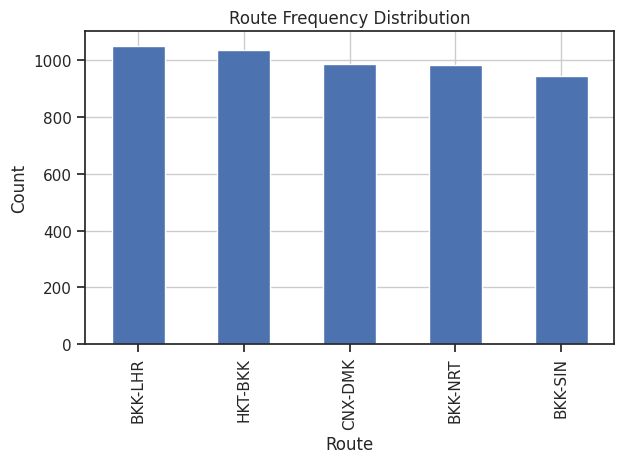

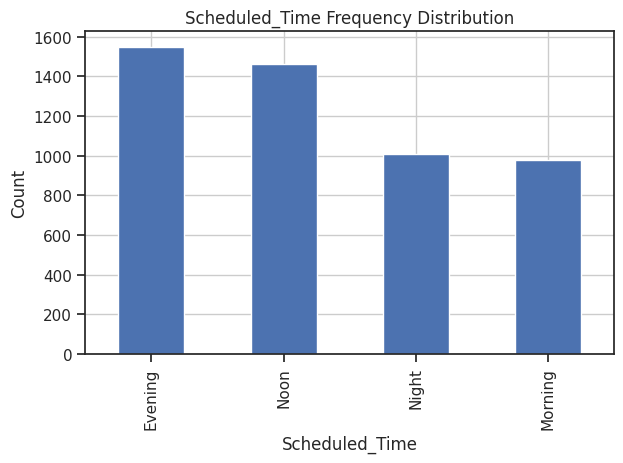

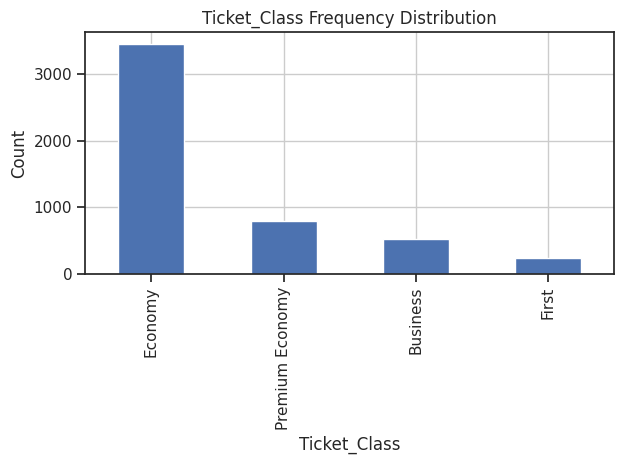

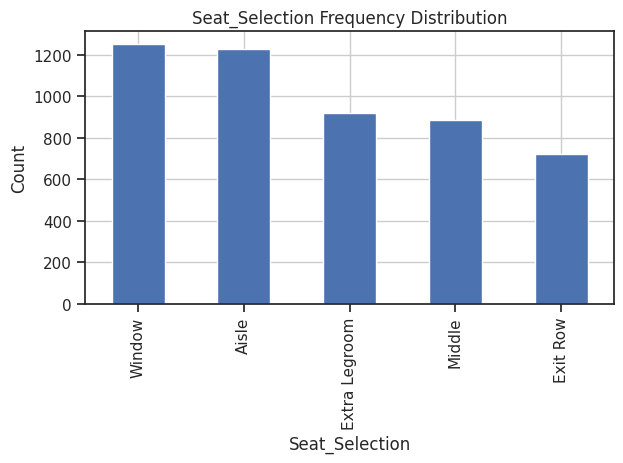

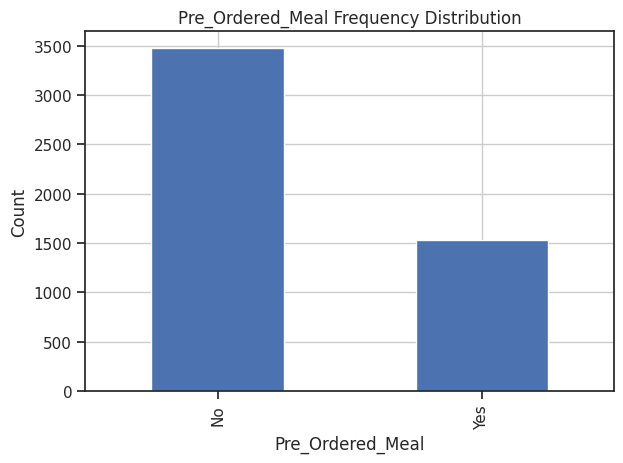

In [18]:
for i in categorical_features.drop('Flight_ID'):
    plt.figure()
    df[i].value_counts().plot(kind='bar')
    plt.title(f'{i} Frequency Distribution')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

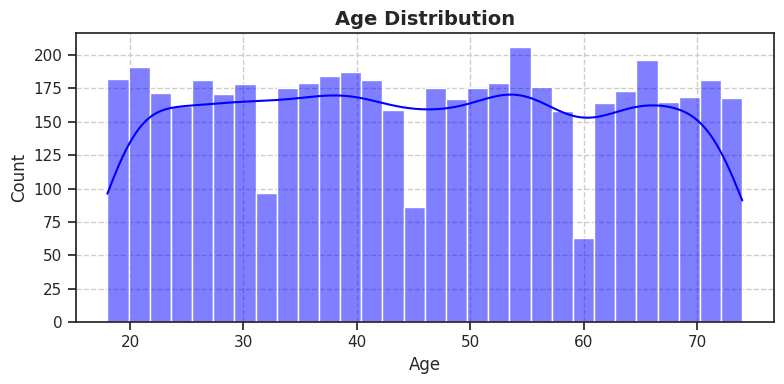

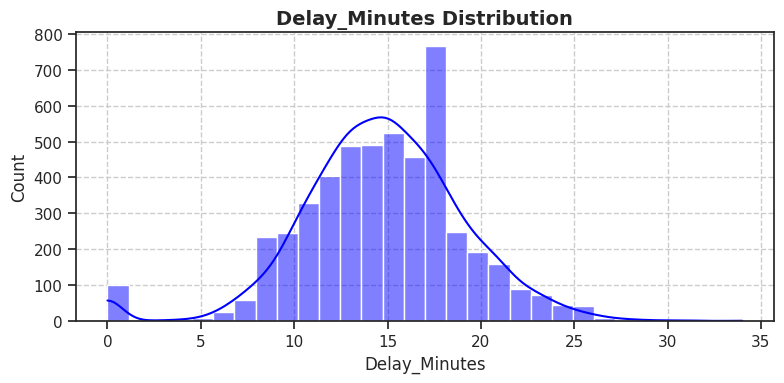

In [19]:
for col in ['Age', 'Delay_Minutes']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} Distribution', fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=1)
    plt.tight_layout()
    plt.show()

In [20]:
numerical_features

Index(['Customer_ID', 'Age', 'Delay_Minutes', 'Cancellation',
       'Base_Ticket_Price_USD', 'Seat_Extra_Charge_USD', 'Meal_Revenue_USD',
       'Total_Revenue_USD'],
      dtype='object')

1. Customer Insights

Age & Gender → who flies more, average age.

Nationality → top nationalities, % distribution.

Loyalty_Status → % of Standard vs. Gold/Platinum.

Booking_Channel → which channel is most popular.

Plots: bar plots, pie charts, countplots.

2. Flight Insights

Delays → average delay by time, route, or class.

Cancellations → % cancelled by route or time.

Route popularity → top routes by number of flights.

Scheduled_Time patterns → morning/evening delays or cancellations.

Plots: histograms, bar plots, heatmaps.

3. Revenue Insights

Total Revenue → by Ticket_Class, Seat_Selection, Meal.

Seat and Meal add-ons → extra revenue contribution.

Top spending customers → by loyalty status or nationality.

Plots: bar plots, box plots, stacked bars.

4. Combined Insights

High-value customers: combine Loyalty_Status + Ticket_Class + Total_Revenue.

Delay vs. Revenue: see if delayed/cancelled flights affect revenue.

Channel performance: which booking channel generates most revenue.

# Customer Insights

### Agen vs Gender: Who flies more, average age

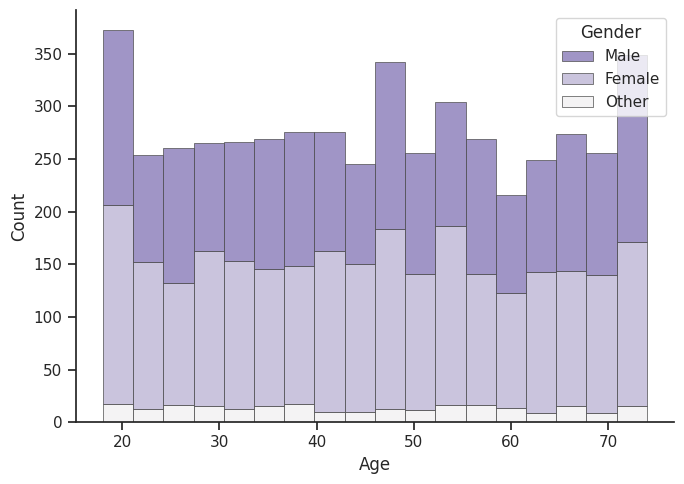

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Age", hue="Gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

In [22]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [23]:



# Unique genders
genders = df['Gender'].unique()

color_map = {"Male": "#1f77b4", "Female": "#ff7f0e", "Other": "#2ca02c"}

fig = px.histogram(
    df,
    x="Age",
    color="Gender",
    barmode="stack",
    labels={"Age":"Age"},
    title="Age Distribution by Gender: Who flies more",
    hover_data=["Age", "Gender"],
    color_discrete_map=color_map
)


fig.update_traces(marker_line_color='black', marker_line_width=1.2, opacity=0.85)

# Layout styling
fig.update_layout(
    title=dict(text="Age Distribution by Gender and age: Who flies more", font=dict(size=20, family="Arial")),
    xaxis=dict(title="Age", tickfont=dict(size=12)),
    yaxis=dict(title="Count", tickfont=dict(size=12), gridcolor='lightgray'),
    plot_bgcolor='white',
    legend=dict(title="Gender", font=dict(size=12)),
    updatemenus=[dict(
        type="dropdown",
        x=1.1,
        y=0.5,
        buttons=[
            dict(label="All", method="update", args=[{"visible":[True]*len(genders)}])
        ] + [
            dict(
                label=gender,
                method="update",
                args=[{"visible": [i==j for j in range(len(genders))]}]
            ) for i, gender in enumerate(genders)
        ]
    )]
)

fig.show()

## Nationality

In [24]:
# Count nationalities
nat_counts = df['Nationality'].value_counts().reset_index()
nat_counts.columns = ['Nationality', 'Count']

# Pie chart
fig = px.pie(
    nat_counts,
    names='Nationality',
    values='Count',
    title='Nationality Distribution',
    color='Nationality',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data=['Count']
)

# “Explode” effect on hover
fig.update_traces(
    pull=[0.05]*len(nat_counts),   # small separation for all slices
    textinfo='percent+label',      # show % and label on chart
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}'
)

fig.update_layout(
    title=dict(font=dict(size=20, family='Arial')),
)

fig.show()

In [25]:
# Count nationalities
nat_counts = df['Nationality'].value_counts().reset_index()
nat_counts.columns = ['Nationality', 'Count']

labels = nat_counts['Nationality']
values = nat_counts['Count']

# Default pull (no selection)
pull_default = [0]*len(labels)

# Create figure
fig = go.Figure(
    data=[go.Pie(
        labels=labels,
        values=values,
        pull=pull_default,
        textinfo='percent+label',
        hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}',
        marker=dict(colors=px.colors.qualitative.Set2)
    )]
)

# Buttons for each nationality
buttons = []

# "All" button (no slice pulled)
buttons.append(dict(
    label="All",
    method="update",
    args=[{"pull":[0]*len(labels)}]
))

# Button for each slice
for i in range(len(labels)):
    pull = [0]*len(labels)
    pull[i] = 0.2  # explode the selected slice
    buttons.append(dict(
        label=labels[i],
        method="update",
        args=[{"pull": [pull]}]
    ))

fig.update_layout(
    title=dict(text='Nationality Distribution', font=dict(size=20, family='Arial')),
    updatemenus=[dict(
        type="dropdown",
        x=1.1,
        y=0.5,
        buttons=buttons
    )]
)

fig.show()


## Loyalty status

In [26]:
df['Loyalty_Status'].value_counts()

,count
Loyalty_Status,
Standard,3509
Silver,983
Gold,369
Platinum,139


In [27]:
loyal_counts = df['Loyalty_Status'].value_counts().reset_index()
loyal_counts.columns = ['Loyalty_Status', 'Count']

fig = px.pie(
    loyal_counts,
    names='Loyalty_Status',
    values='Count',
    title='Loyalty Status Distribution',
    color='Loyalty_Status',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data=['Count']
)

fig.update_traces(textinfo='percent+label', pull=[0.05]*len(loyal_counts))
fig.show()


In [28]:
# Unique values
genders = df['Gender'].unique()
loyalty = df['Loyalty_Status'].unique()
nationalities = df['Nationality'].unique()

# Base histogram
fig = px.histogram(
    df,
    x="Age",
    color="Gender",
    barmode="stack",
    labels={"Age":"Age"},
    hover_data=["Age", "Gender", "Loyalty_Status", "Nationality"],
)

# Add marker edges
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.85)

# Layout styling
fig.update_layout(
    title=dict(text="Age Distribution by Gender / Loyalty / Nationality", font=dict(size=20)),
    xaxis=dict(title="Age"),
    yaxis=dict(title="Count", gridcolor='lightgray'),
    plot_bgcolor='white',
)

# Dropdown for Gender
buttons_gender = [
    dict(label="All Genders", method="update", args=[{"visible": [True]*len(genders)}])
] + [
    dict(
        label=g,
        method="update",
        args=[{"visible": [row == g for row in df['Gender']]}]
    ) for g in genders
]

# Dropdown for Loyalty Status
buttons_loyalty = [
    dict(label="All Loyalty", method="update", args=[{"visible": [True]*len(df)}])
] + [
    dict(
        label=l,
        method="update",
        args=[{"visible": [row == l for row in df['Loyalty_Status']]}]
    ) for l in loyalty
]

# Dropdown for Nationality
buttons_nation = [
    dict(label="All Nationalities", method="update", args=[{"visible": [True]*len(df)}])
] + [
    dict(
        label=n,
        method="update",
        args=[{"visible": [row == n for row in df['Nationality']]}]
    ) for n in nationalities
]

# Add dropdowns
fig.update_layout(
    updatemenus=[
        dict(buttons=buttons_gender, x=1.05, y=0.9, showactive=True, direction="down"),
        dict(buttons=buttons_loyalty, x=1.05, y=0.7, showactive=True, direction="down"),
        dict(buttons=buttons_nation, x=1.05, y=0.5, showactive=True, direction="down"),
    ]
)

fig.show()


## Booking Channel - Ticket Booking

In [29]:
df['Booking_Channel'].value_counts()

,count
Booking_Channel,
Agent,1708
Online,1679
Direct,1613


In [30]:
fig = px.pie(
    df,
    names='Booking_Channel',
    title="Booking Channel Distribution",
    hole=0.3
)

fig.show()


In [31]:
df['Booking_Channel'].value_counts().reset_index().rename(
    columns={'index': 'Channel', 'Booking_Channel': 'Count'}
)


,Count,count
0,Agent,1708
1,Online,1679
2,Direct,1613


In [32]:
counts = df['Booking_Channel'].value_counts().reset_index()
counts.columns = ['Booking_Channel', 'Count']

fig = px.bar(
    counts,
    x='Booking_Channel',
    y='Count',
    color='Booking_Channel',
    text='Count',
    title="Most Popular Booking Channel"
)

fig.update_traces(
    textposition="outside",
    marker_line_color="black",
    marker_line_width=1
)

fig.update_layout(
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


In [33]:
counts = df['Booking_Channel'].value_counts()
labels = counts.index
values = counts.values

# Pull each slice slightly outward
pull_values = [0.03] * len(labels)   # 0.08 = nice separation

fig = px.pie(
    names=labels,
    values=values,
    title="Booking Channel Distribution",
    hole=0.3
)

fig.update_traces(pull=pull_values)  # apply separation

fig.show()


In [34]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Nationality', 'Loyalty_Status',
       'Booking_Channel', 'Flight_ID', 'Route', 'Departure_Date',
       'Scheduled_Time', 'Delay_Minutes', 'Cancellation', 'Ticket_Class',
       'Base_Ticket_Price_USD', 'Seat_Selection', 'Seat_Extra_Charge_USD',
       'Pre_Ordered_Meal', 'Meal_Revenue_USD', 'Total_Revenue_USD'],
      dtype='object')

# Flight Insights

## Average Delay By Route

In [35]:
delay_route = df.groupby("Route")["Delay_Minutes"].mean().reset_index()

fig = px.bar(
    delay_route.sort_values("Delay_Minutes", ascending=False),
    x="Delay_Minutes",
    y="Route",
    orientation="h",
    title="Average Delay by Route",
    labels={"Delay_Minutes":"Avg Delay (min)"},
)
fig.show()


## Delay distribution over time of day (Scheduled_Time)

In [36]:
# df["Hour"] = df["Scheduled_Time"].str.slice(0,2).astype(int)

# delay_hour = df.groupby("Hour")["Delay_Minutes"].mean().reset_index()

# fig = px.line(
#     delay_hour,
#     x="Hour",
#     y="Delay_Minutes",
#     markers=True,
#     title="Average Delay by Hour of Day"
# )
# fig.show()


In [37]:
fig = px.box(
    df,
    x="Ticket_Class",
    y="Delay_Minutes",
    title="Delay Distribution by Ticket Class"
)
fig.show()

# Cancellations

### Cancellation % by Route

In [38]:
cancel_route = df.groupby("Route")["Cancellation"].mean().reset_index()
cancel_route["Cancellation"] *= 100

fig = px.bar(
    cancel_route.sort_values("Cancellation", ascending=False),
    x="Route",
    y="Cancellation",
    title="Cancellation Rate by Route (%)"
)
fig.show()

### Top 10 most flown routes

In [39]:
route_counts = df["Route"].value_counts().reset_index()
route_counts.columns = ["Route", "Count"]

fig = px.bar(
    route_counts.head(10),
    x="Count",
    y="Route",
    orientation="h",
    title="Routes Ranked based on popularity"
)
fig.show()


# REVENUE INSIGHTS

### Total Revenue by Ticket Class

In [40]:
rev_class = df.groupby("Ticket_Class")["Total_Revenue_USD"].mean().reset_index()

fig = px.bar(
    rev_class,
    x="Ticket_Class",
    y="Total_Revenue_USD",
    title="Average Total Revenue by Ticket Class",
    labels={"Total_Revenue_USD": "Avg Revenue (USD)"},
)
fig.show()


### Seat Selection Revenue Impact

In [41]:
seat_rev = df.groupby("Seat_Selection")["Seat_Extra_Charge_USD"].mean().reset_index()

fig = px.bar(
    seat_rev,
    x="Seat_Selection",
    y="Seat_Extra_Charge_USD",
    title="Average Seat Extra Revenue by Seat Type",
    labels={"Seat_Extra_Charge_USD": "Average Extra Revenue (USD)"}
)
fig.show()


### Meal Add-On Revenue

In [42]:
meal_rev = df.groupby("Pre_Ordered_Meal")["Meal_Revenue_USD"].mean().reset_index()

fig = px.bar(
    meal_rev,
    x="Pre_Ordered_Meal",
    y="Meal_Revenue_USD",
    title="Average Meal Revenue (Meal vs No Meal)",
    labels={"Meal_Revenue_USD": "Avg Meal Revenue (USD)"}
)
fig.show()


### Total Revenue by Loyalty Status

In [43]:
rev_loyalty = df.groupby("Loyalty_Status")["Total_Revenue_USD"].mean().reset_index()

fig = px.bar(
    rev_loyalty,
    x="Loyalty_Status",
    y="Total_Revenue_USD",
    title="Average Total Revenue by Loyalty Status",
)
fig.show()


### Top Spending Nationalities

In [44]:
rev_nat = (
    df.groupby("Nationality")["Total_Revenue_USD"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(
    rev_nat.head(10),
    x="Total_Revenue_USD",
    y="Nationality",
    orientation="h",
    title="Top 10 Nationalities by Average Revenue",
)
fig.show()


### High-Spending Customers ("Top 10 Customers")

In [45]:
top_customers = (
    df.groupby("Customer_ID")["Total_Revenue_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    top_customers,
    x="Customer_ID",
    y="Total_Revenue_USD",
    title="Top 10 Highest Spending Customers",
)
fig.show()


### Add-On Revenue Contribution (Seat vs Meal)

In [46]:
addon_totals = {
    "Seat Extra Charge": df["Seat_Extra_Charge_USD"].sum(),
    "Meal Revenue": df["Meal_Revenue_USD"].sum(),
}

fig = px.pie(
    names=list(addon_totals.keys()),
    values=list(addon_totals.values()),
    title="Add-On Revenue Contribution"
)
fig.show()


### Total Revenue Breakdown (Base vs Seat vs Meal)

In [47]:
rev_break = df.groupby("Ticket_Class")[["Base_Ticket_Price_USD",
                                         "Seat_Extra_Charge_USD",
                                         "Meal_Revenue_USD"]].mean().reset_index()

fig = px.bar(
    rev_break,
    x="Ticket_Class",
    y=["Base_Ticket_Price_USD", "Seat_Extra_Charge_USD", "Meal_Revenue_USD"],
    title="Revenue Breakdown per Ticket Class",
)
fig.show()


# Shared Insights

### High-Value Customers

In [48]:
fig = px.box(
    df,
    x="Ticket_Class",
    y="Total_Revenue_USD",
    color="Loyalty_Status",
    title="Revenue Distribution by Ticket Class & Loyalty Status"
)
fig.show()


### High-Value Customers – Sunburst Chart

In [49]:
fig = px.sunburst(
    df,
    path=['Loyalty_Status', 'Ticket_Class'],
    values='Total_Revenue_USD',
    title="Revenue Breakdown: Loyalty Status → Ticket Class"
)
fig.show()


### Delay vs Revenue – Scatter Plot

In [50]:
fig = px.scatter(
    df,
    x='Delay_Minutes',
    y='Total_Revenue_USD',
    color='Ticket_Class',
    trendline='ols',
    title="Delay vs Revenue (Colored by Ticket Class)"
)
fig.show()

### Delay vs Revenue – Correlation Heatmap

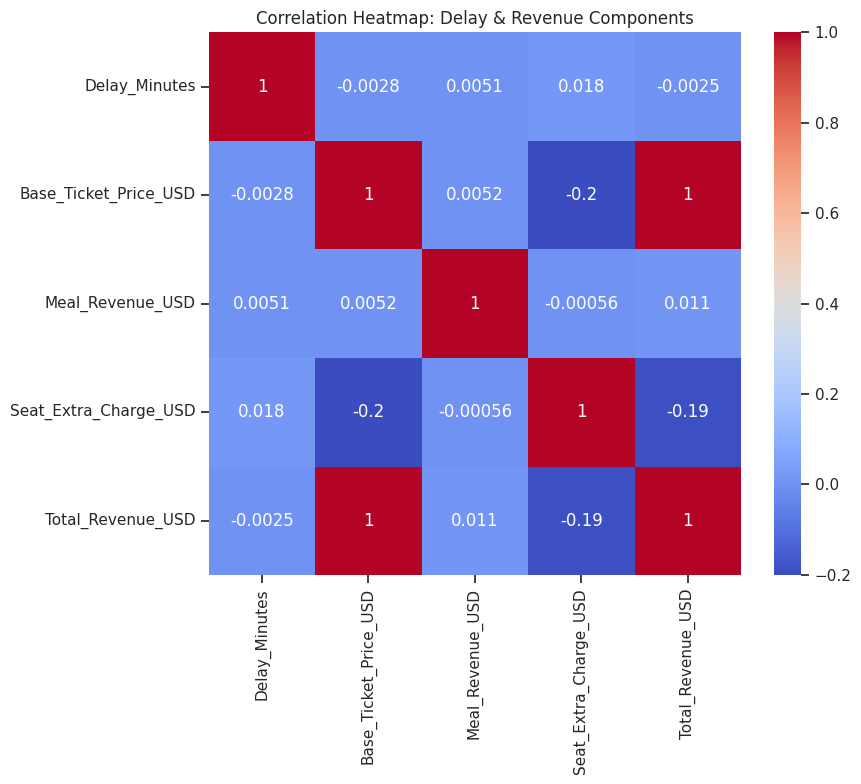

In [51]:
num_cols = [
    'Delay_Minutes',
    'Base_Ticket_Price_USD',
    'Meal_Revenue_USD',
    'Seat_Extra_Charge_USD',
    'Total_Revenue_USD'
]

corr = df[num_cols].corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Delay & Revenue Components")
plt.show()


### Delay vs Revenue – Bar Chart (On-time vs Delayed)

In [52]:
df['Delay_Group'] = df['Delay_Minutes'].apply(lambda x: "On-Time" if x == 0 else "Delayed")

rev_delay = df.groupby('Delay_Group')['Total_Revenue_USD'].mean().reset_index()

fig = px.bar(
    rev_delay,
    x='Delay_Group',
    y='Total_Revenue_USD',
    title="Average Revenue: On-Time vs Delayed Flights",
    text_auto=True
)
fig.show()


### Booking Channel – Revenue Bar Chart

In [53]:
rev_channel = df.groupby("Booking_Channel")['Total_Revenue_USD'].sum().reset_index()

fig = px.bar(
    rev_channel,
    x="Booking_Channel",
    y="Total_Revenue_USD",
    title="Total Revenue by Booking Channel",
    text_auto=True
)
fig.show()


### Booking Channel – Revenue Pie Chart

In [54]:
fig = px.pie(
    rev_channel,
    names="Booking_Channel",
    values="Total_Revenue_USD",
    hole=0.3,
    title="Revenue Distribution by Booking Channel"
)
fig.show()


### Booking Channel – Funnel Chart

In [55]:
# Optional: sort by revenue to show funnel effect
rev_channel_sorted = rev_channel.sort_values('Total_Revenue_USD', ascending=False)

fig = px.funnel(
    rev_channel_sorted,
    x='Total_Revenue_USD',
    y='Booking_Channel',
    title="Revenue Funnel by Booking Channel"
)
fig.show()


### Cancellation % by Route (Grouped Bar)

In [56]:
cancel_route = df.groupby('Route')['Cancellation'].mean().reset_index()
cancel_route['Cancellation'] *= 100  # convert to %

fig = px.bar(
    cancel_route,
    x='Route',
    y='Cancellation',
    title="Cancellation Percentage by Route",
    text_auto='.2f'
)
fig.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            5000 non-null   int64         
 1   Age                    5000 non-null   int64         
 2   Gender                 5000 non-null   object        
 3   Nationality            5000 non-null   object        
 4   Loyalty_Status         5000 non-null   object        
 5   Booking_Channel        5000 non-null   object        
 6   Flight_ID              5000 non-null   object        
 7   Route                  5000 non-null   object        
 8   Departure_Date         5000 non-null   datetime64[ns]
 9   Scheduled_Time         5000 non-null   object        
 10  Delay_Minutes          5000 non-null   int64         
 11  Cancellation           5000 non-null   int64         
 12  Ticket_Class           5000 non-null   object        
 13  Bas

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
df_copy = df.copy()

In [60]:
df['Seat_Bought'] = (df['Seat_Extra_Charge_USD'] > 0).astype(int)
df['Meal_Bought'] = (df['Pre_Ordered_Meal'] == 'Yes').astype(int)

In [61]:
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])
df['Month'] = df['Departure_Date'].dt.month
df['Weekday'] = df['Departure_Date'].dt.weekday

In [62]:
categorical_cols = ['Gender','Nationality','Loyalty_Status','Booking_Channel','Route','Scheduled_Time','Ticket_Class','Seat_Selection']

In [63]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [64]:
num_cols = ['Age','Base_Ticket_Price_USD','Seat_Extra_Charge_USD','Meal_Revenue_USD','Delay_Minutes','Total_Revenue_USD']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [65]:
### predictive analysis could be done too

In [66]:
# ===== STEP 1: Install required packages (run this first if needed) =====
# !pip install plotly ipywidgets -q

# ===== STEP 2: Enable widgets in Colab =====
from google.colab import output
output.enable_custom_widget_manager()

# ===== STEP 3: Import libraries =====
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.io as pio

# Configure Plotly for Colab
pio.renderers.default = "colab"

# ===== STEP 4: Create sample data (REMOVE THIS if you have your own df) =====
import numpy as np
np.random.seed(42)

# n_samples = 1000
# df = pd.DataFrame({
#     'Gender': np.random.choice(['Male', 'Female'], n_samples),
#     'Nationality': np.random.choice(['USA', 'UK', 'Canada', 'Germany', 'France'], n_samples),
#     'Loyalty_Status': np.random.choice(['Gold', 'Silver', 'Bronze', 'None'], n_samples),
#     'Booking_Channel': np.random.choice(['Online', 'Mobile', 'Agency'], n_samples),
#     'Route': np.random.choice(['JFK-LAX', 'ORD-MIA', 'ATL-DEN', 'DFW-SFO'], n_samples),
#     'Scheduled_Time': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_samples),
#     'Ticket_Class': np.random.choice(['Economy', 'Business', 'First'], n_samples),
#     'Seat_Selection': np.random.choice(['Window', 'Aisle', 'Middle'], n_samples),
#     'Pre_Ordered_Meal': np.random.choice(['Yes', 'No'], n_samples),
#     'Delay_Group': np.random.choice(['No Delay', 'Short', 'Medium', 'Long'], n_samples),
#     'Age': np.random.randint(18, 80, n_samples),
#     'Delay_Minutes': np.random.randint(0, 180, n_samples),
#     'Base_Ticket_Price_USD': np.random.uniform(100, 1000, n_samples),
#     'Seat_Extra_Charge_USD': np.random.uniform(0, 100, n_samples),
#     'Meal_Revenue_USD': np.random.uniform(0, 50, n_samples),
#     'Total_Revenue_USD': np.random.uniform(100, 1200, n_samples),
#     'Departure_Date': pd.date_range('2024-01-01', periods=n_samples, freq='H')
# })

# ===== STEP 5: Prepare data =====
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])

# Define column types
categorical_cols = ['Gender', 'Nationality', 'Loyalty_Status', 'Booking_Channel',
                    'Route', 'Scheduled_Time', 'Ticket_Class', 'Seat_Selection',
                    'Pre_Ordered_Meal', 'Delay_Group']
numeric_cols = ['Age', 'Delay_Minutes', 'Base_Ticket_Price_USD',
                'Seat_Extra_Charge_USD', 'Meal_Revenue_USD', 'Total_Revenue_USD']

# ===== STEP 6: Dashboard Class =====
class InteractiveDashboard:
    def __init__(self, dataframe):
        self.df = dataframe
        self.filtered_df = dataframe.copy()

        # Create widgets
        self.column_dropdown = widgets.Dropdown(
            options=categorical_cols + numeric_cols,
            value='Delay_Minutes',
            description='Column:',
            style={'description_width': '100px'},
            layout=widgets.Layout(width='300px')
        )

        self.plot_type_dropdown = widgets.Dropdown(
            options=['Bar Chart', 'Pie Chart', 'Histogram', 'Box Plot', 'Violin Plot', 'Line Chart'],
            value='Histogram',
            description='Plot Type:',
            style={'description_width': '100px'},
            layout=widgets.Layout(width='300px')
        )

        self.filter_multiselect = widgets.SelectMultiple(
            options=[],
            description='Filter:',
            style={'description_width': '100px'},
            layout=widgets.Layout(width='300px', height='150px'),
            disabled=False
        )

        self.select_all_button = widgets.Button(
            description='Select All',
            button_style='info',
            layout=widgets.Layout(width='145px')
        )

        self.clear_all_button = widgets.Button(
            description='Clear All',
            button_style='warning',
            layout=widgets.Layout(width='145px')
        )

        self.color_by_dropdown = widgets.Dropdown(
            options=['None'] + categorical_cols,
            value='None',
            description='Color By:',
            style={'description_width': '100px'},
            layout=widgets.Layout(width='300px')
        )

        self.show_stats = widgets.Checkbox(
            value=True,
            description='Show Statistics',
            style={'description_width': '100px'}
        )

        self.output = widgets.Output()

        # Set up observers
        self.column_dropdown.observe(self._on_column_change, names='value')
        self.plot_type_dropdown.observe(self._update_plot, names='value')
        self.filter_multiselect.observe(self._on_filter_change, names='value')
        self.color_by_dropdown.observe(self._update_plot, names='value')
        self.show_stats.observe(self._update_plot, names='value')
        self.select_all_button.on_click(self._select_all)
        self.clear_all_button.on_click(self._clear_all)

        # Initialize
        self._update_filter_options()

    def _on_column_change(self, change):
        self._update_filter_options()
        self._update_plot()

    def _update_filter_options(self):
        col = self.column_dropdown.value
        if col in categorical_cols:
            try:
                unique_vals = sorted([str(x) for x in self.df[col].dropna().unique()])
                self.filter_multiselect.options = unique_vals
                self.filter_multiselect.value = unique_vals
                self.filter_multiselect.disabled = False
            except Exception as e:
                print(f"Error updating filters: {e}")
                self.filter_multiselect.options = []
                self.filter_multiselect.disabled = True
        else:
            self.filter_multiselect.options = []
            self.filter_multiselect.value = []
            self.filter_multiselect.disabled = True

    def _on_filter_change(self, change):
        self._update_plot()

    def _select_all(self, b):
        if self.filter_multiselect.options:
            self.filter_multiselect.value = list(self.filter_multiselect.options)

    def _clear_all(self, b):
        self.filter_multiselect.value = []

    def _update_plot(self, change=None):
        with self.output:
            clear_output(wait=True)

            try:
                col = self.column_dropdown.value
                plot_type = self.plot_type_dropdown.value
                color_by = self.color_by_dropdown.value if self.color_by_dropdown.value != 'None' else None

                # Filter data
                self.filtered_df = self.df.copy()
                if col in categorical_cols and self.filter_multiselect.value:
                    self.filtered_df = self.filtered_df[self.filtered_df[col].isin(self.filter_multiselect.value)]

                if len(self.filtered_df) == 0:
                    print("⚠️ No data to display with current filters")
                    return

                # Create figure
                fig = self._create_plot(col, plot_type, color_by)

                if fig:
                    fig.update_layout(
                        height=600,
                        template='plotly_white',
                        hovermode='closest',
                        title_font_size=16,
                        showlegend=True,
                        paper_bgcolor='white',
                        plot_bgcolor='white',
                        font=dict(color='black')
                    )

                    fig.show()

                    # Show statistics
                    if self.show_stats.value:
                        self._show_statistics(col)
            except Exception as e:
                print(f"❌ Error creating plot: {e}")
                import traceback
                traceback.print_exc()

    def _create_plot(self, col, plot_type, color_by):
        data = self.filtered_df

        if plot_type == 'Bar Chart':
            if col in categorical_cols:
                counts = data[col].value_counts().reset_index()
                counts.columns = [col, 'Count']
                counts = counts.sort_values('Count', ascending=False)

                fig = go.Figure()
                fig.add_trace(go.Bar(
                    x=counts[col],
                    y=counts['Count'],
                    marker_color='indianred',
                    text=counts['Count'],
                    textposition='auto',
                    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
                ))
                fig.update_layout(
                    title=f'Distribution of {col}',
                    xaxis_title=col,
                    yaxis_title='Count'
                )
            else:
                fig = go.Figure()
                fig.add_trace(go.Bar(
                    x=data.index[:50],
                    y=data[col][:50],
                    marker_color='steelblue',
                    hovertemplate='Index: %{x}<br>Value: %{y}<extra></extra>'
                ))
                fig.update_layout(
                    title=f'{col} Values (First 50 Records)',
                    xaxis_title='Index',
                    yaxis_title=col
                )
            return fig

        elif plot_type == 'Pie Chart':
            if col in categorical_cols:
                counts = data[col].value_counts().reset_index()
                counts.columns = [col, 'Count']

                fig = go.Figure()
                fig.add_trace(go.Pie(
                    labels=counts[col],
                    values=counts['Count'],
                    hole=0.3,
                    textinfo='label+percent',
                    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>'
                ))
                fig.update_layout(title=f'Distribution of {col}')
            else:
                bins = pd.cut(data[col], bins=5)
                counts = bins.value_counts().reset_index()
                counts.columns = ['Range', 'Count']
                counts['Range'] = counts['Range'].astype(str)

                fig = go.Figure()
                fig.add_trace(go.Pie(
                    labels=counts['Range'],
                    values=counts['Count'],
                    hole=0.3,
                    textinfo='label+percent'
                ))
                fig.update_layout(title=f'Distribution of {col} (Binned)')
            return fig

        elif plot_type == 'Histogram':
            fig = go.Figure()

            if color_by and color_by in categorical_cols:
                for category in data[color_by].unique():
                    subset = data[data[color_by] == category]
                    fig.add_trace(go.Histogram(
                        x=subset[col],
                        name=str(category),
                        opacity=0.7,
                        hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
                    ))
                fig.update_layout(barmode='overlay')
            else:
                fig.add_trace(go.Histogram(
                    x=data[col],
                    marker_color='teal',
                    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
                ))

            fig.update_layout(
                title=f'Histogram of {col}',
                xaxis_title=col,
                yaxis_title='Frequency'
            )
            return fig

        elif plot_type == 'Box Plot':
            fig = go.Figure()

            if col in numeric_cols:
                if color_by and color_by in categorical_cols:
                    for category in sorted(data[color_by].unique()):
                        subset = data[data[color_by] == category]
                        fig.add_trace(go.Box(
                            y=subset[col],
                            name=str(category),
                            boxmean='sd'
                        ))
                else:
                    fig.add_trace(go.Box(
                        y=data[col],
                        name=col,
                        marker_color='lightseagreen',
                        boxmean='sd'
                    ))
            else:
                numeric_col = 'Total_Revenue_USD'
                for category in sorted(data[col].unique()):
                    subset = data[data[col] == category]
                    fig.add_trace(go.Box(
                        y=subset[numeric_col],
                        name=str(category),
                        boxmean='sd'
                    ))

            fig.update_layout(
                title=f'Box Plot of {col}',
                yaxis_title=col if col in numeric_cols else 'Total_Revenue_USD'
            )
            return fig

        elif plot_type == 'Violin Plot':
            fig = go.Figure()

            if col in numeric_cols:
                if color_by and color_by in categorical_cols:
                    for category in sorted(data[color_by].unique()):
                        subset = data[data[color_by] == category]
                        fig.add_trace(go.Violin(
                            y=subset[col],
                            name=str(category),
                            box_visible=True,
                            meanline_visible=True
                        ))
                else:
                    fig.add_trace(go.Violin(
                        y=data[col],
                        name=col,
                        box_visible=True,
                        meanline_visible=True,
                        fillcolor='lightblue'
                    ))
            else:
                numeric_col = 'Total_Revenue_USD'
                for category in sorted(data[col].unique()):
                    subset = data[data[col] == category]
                    fig.add_trace(go.Violin(
                        y=subset[numeric_col],
                        name=str(category),
                        box_visible=True,
                        meanline_visible=True
                    ))

            fig.update_layout(
                title=f'Violin Plot of {col}',
                yaxis_title=col if col in numeric_cols else 'Total_Revenue_USD'
            )
            return fig

        elif plot_type == 'Line Chart':
            if col in numeric_cols:
                fig = go.Figure()
                fig.add_trace(go.Scatter(
                    x=data.index,
                    y=data[col],
                    mode='lines',
                    line=dict(color='royalblue', width=2),
                    hovertemplate='Index: %{x}<br>Value: %{y}<extra></extra>'
                ))
                fig.update_layout(
                    title=f'{col} Over Records',
                    xaxis_title='Record Index',
                    yaxis_title=col
                )
            else:
                counts = data.groupby(data.index // 100)[col].value_counts().unstack(fill_value=0)
                fig = go.Figure()
                for cat in counts.columns:
                    fig.add_trace(go.Scatter(
                        x=counts.index,
                        y=counts[cat],
                        mode='lines+markers',
                        name=str(cat)
                    ))
                fig.update_layout(
                    title=f'{col} Distribution Over Record Batches',
                    xaxis_title='Batch (100 records)',
                    yaxis_title='Count'
                )
            return fig

        return None

    def _show_statistics(self, col):
        data = self.filtered_df[col]

        print(f"\n📊 Statistics for {col} (n={len(data):,})")
        print("=" * 60)

        if col in numeric_cols:
            print(f"Mean:     {data.mean():.2f}")
            print(f"Median:   {data.median():.2f}")
            print(f"Std Dev:  {data.std():.2f}")
            print(f"Min:      {data.min():.2f}")
            print(f"Max:      {data.max():.2f}")
            print(f"Q1:       {data.quantile(0.25):.2f}")
            print(f"Q3:       {data.quantile(0.75):.2f}")
        else:
            counts = data.value_counts()
            print(f"Unique Values: {data.nunique()}")
            print(f"\nTop 5 Categories:")
            for idx, (cat, count) in enumerate(counts.head().items(), 1):
                pct = (count / len(data)) * 100
                print(f"  {idx}. {cat}: {count:,} ({pct:.1f}%)")

    def display(self):
        title = widgets.HTML(
            value="<h2 style='text-align: center; color: #2c3e50; background-color: white; padding: 10px;'>✈️ Airline Data Interactive Dashboard</h2>"
        )

        controls_box = widgets.VBox([
            widgets.HTML(value="<h3 style='color: #34495e;'>Controls</h3>"),
            self.column_dropdown,
            self.plot_type_dropdown,
            self.color_by_dropdown,
            self.show_stats,
            widgets.HTML(value="<h4 style='color: #34495e; margin-top: 15px;'>Filters</h4>"),
            self.filter_multiselect,
            widgets.HBox([self.select_all_button, self.clear_all_button]),
        ], layout=widgets.Layout(padding='10px', border='2px solid #bdc3c7', border_radius='5px', background_color='white'))

        main_layout = widgets.HBox([
            controls_box,
            self.output
        ], layout=widgets.Layout(width='100%'))

        full_layout = widgets.VBox([title, main_layout])

        display(full_layout)
        self._update_plot()

# ===== STEP 7: Run the dashboard =====
print("🚀 Initializing dashboard...")
dashboard = InteractiveDashboard(df)
dashboard.display()
print("✅ Dashboard ready!")

🚀 Initializing dashboard...


✅ Dashboard ready!


In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from scipy import stats

# Load data
# df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])

numeric_cols = ['Age', 'Delay_Minutes', 'Base_Ticket_Price_USD',
                'Seat_Extra_Charge_USD', 'Meal_Revenue_USD', 'Total_Revenue_USD']
categorical_cols = ['Gender', 'Nationality', 'Loyalty_Status', 'Booking_Channel',
                    'Route', 'Ticket_Class']

class StatisticsEDA:
    def __init__(self, dataframe):
        self.df = dataframe

        # Widgets
        self.variable_dropdown = widgets.Dropdown(
            options=numeric_cols,
            value='Delay_Minutes',
            description='Variable:',
            style={'description_width': '80px'},
            layout=widgets.Layout(width='280px')
        )

        self.measure_dropdown = widgets.Dropdown(
            options=[
                'All Statistics',
                'Central Tendency (Mean, Median, Mode)',
                'Dispersion (Variance, Std Dev, Range)',
                'Distribution Shape (Skewness, Kurtosis)',
                'Empirical Rule (68-95-99.7)',
                'Quartiles & IQR',
                'Outlier Analysis',
                'Normality Test'
            ],
            value='All Statistics',
            description='Measure:',
            style={'description_width': '80px'},
            layout=widgets.Layout(width='280px')
        )

        self.group_by_dropdown = widgets.Dropdown(
            options=['None'] + categorical_cols,
            value='None',
            description='Group By:',
            style={'description_width': '80px'},
            layout=widgets.Layout(width='280px')
        )

        self.output = widgets.Output()

        # Observers
        self.variable_dropdown.observe(self._update, names='value')
        self.measure_dropdown.observe(self._update, names='value')
        self.group_by_dropdown.observe(self._update, names='value')

    def _update(self, change=None):
        with self.output:
            clear_output(wait=True)

            var = self.variable_dropdown.value
            measure = self.measure_dropdown.value
            group_by = self.group_by_dropdown.value if self.group_by_dropdown.value != 'None' else None

            if measure == 'All Statistics':
                self._plot_all_stats(var, group_by)
            elif 'Central Tendency' in measure:
                self._plot_central_tendency(var, group_by)
            elif 'Dispersion' in measure:
                self._plot_dispersion(var, group_by)
            elif 'Shape' in measure:
                self._plot_shape(var, group_by)
            elif 'Empirical Rule' in measure:
                self._plot_empirical_rule(var, group_by)
            elif 'Quartiles' in measure:
                self._plot_quartiles(var, group_by)
            elif 'Outlier' in measure:
                self._plot_outliers(var, group_by)
            elif 'Normality' in measure:
                self._plot_normality(var, group_by)

    def _get_groups(self, var, group_by):
        if group_by:
            groups = {}
            for cat in self.df[group_by].unique():
                groups[cat] = self.df[self.df[group_by] == cat][var].dropna()
            return groups
        return {'All Data': self.df[var].dropna()}

    def _plot_all_stats(self, var, group_by):
        groups = self._get_groups(var, group_by)

        # Create 2x2 subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Distribution with Stats', 'Box Plot',
                          'Q-Q Plot', 'Measures Summary'),
            specs=[[{'type': 'histogram'}, {'type': 'box'}],
                   [{'type': 'scatter'}, {'type': 'table'}]]
        )

        colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

        for idx, (name, data) in enumerate(groups.items()):
            color = colors[idx % len(colors)]

            # Histogram with normal curve
            fig.add_trace(go.Histogram(
                x=data, name=name, opacity=0.7,
                marker_color=color, histnorm='probability density'
            ), row=1, col=1)

            # Add normal curve
            mu, sigma = data.mean(), data.std()
            x_range = np.linspace(data.min(), data.max(), 100)
            y_norm = stats.norm.pdf(x_range, mu, sigma)
            fig.add_trace(go.Scatter(
                x=x_range, y=y_norm, name=f'{name} Normal',
                line=dict(color=color, dash='dash'), showlegend=False
            ), row=1, col=1)

            # Box plot
            fig.add_trace(go.Box(
                y=data, name=name, marker_color=color
            ), row=1, col=2)

            # Q-Q plot
            theoretical_q = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))
            sample_q = np.sort(data)
            fig.add_trace(go.Scatter(
                x=theoretical_q, y=sample_q, mode='markers',
                name=name, marker=dict(color=color, size=4)
            ), row=2, col=1)

        # Add reference line for Q-Q plot
        all_data = pd.concat(groups.values())
        qq_range = [all_data.min(), all_data.max()]
        fig.add_trace(go.Scatter(
            x=qq_range, y=qq_range, mode='lines',
            line=dict(color='red', dash='dash'), name='Normal Line',
            showlegend=False
        ), row=2, col=1)

        # Statistics table
        table_data = []
        for name, data in groups.items():
            table_data.append([
                name,
                f"{data.mean():.2f}",
                f"{data.median():.2f}",
                f"{data.std():.2f}",
                f"{stats.skew(data):.2f}",
                f"{stats.kurtosis(data):.2f}"
            ])

        fig.add_trace(go.Table(
            header=dict(values=['Group', 'Mean', 'Median', 'Std Dev', 'Skewness', 'Kurtosis'],
                       fill_color='#34495e', font=dict(color='white', size=12)),
            cells=dict(values=list(zip(*table_data)),
                      fill_color='#ecf0f1', font=dict(size=11))
        ), row=2, col=2)

        fig.update_xaxes(title_text=var, row=1, col=1)
        fig.update_xaxes(title_text="Theoretical Quantiles", row=2, col=1)
        fig.update_yaxes(title_text="Density", row=1, col=1)
        fig.update_yaxes(title_text=var, row=1, col=2)
        fig.update_yaxes(title_text="Sample Quantiles", row=2, col=1)

        fig.update_layout(height=700, showlegend=True, template='plotly_white',
                         title_text=f"Complete Statistical Analysis: {var}")
        fig.show()

        self._print_detailed_stats(var, groups)

    def _plot_central_tendency(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Measures of Central Tendency', 'Distribution with Markers')
        )

        # Bar chart of measures
        group_names = list(groups.keys())
        means = [data.mean() for data in groups.values()]
        medians = [data.median() for data in groups.values()]
        modes = [data.mode()[0] if len(data.mode()) > 0 else data.median() for data in groups.values()]

        fig.add_trace(go.Bar(name='Mean', x=group_names, y=means, marker_color='#3498db'), row=1, col=1)
        fig.add_trace(go.Bar(name='Median', x=group_names, y=medians, marker_color='#2ecc71'), row=1, col=1)
        fig.add_trace(go.Bar(name='Mode', x=group_names, y=modes, marker_color='#e74c3c'), row=1, col=1)

        # Histogram with lines
        for name, data in groups.items():
            fig.add_trace(go.Histogram(x=data, name=name, opacity=0.6), row=1, col=2)

            mean_val = data.mean()
            median_val = data.median()
            fig.add_trace(go.Scatter(x=[mean_val, mean_val], y=[0, 100],
                                    mode='lines', name=f'{name} Mean',
                                    line=dict(dash='dash', width=2)), row=1, col=2)

        fig.update_layout(height=500, showlegend=True, template='plotly_white',
                         title_text=f"Central Tendency Analysis: {var}")
        fig.update_xaxes(title_text="Group", row=1, col=1)
        fig.update_xaxes(title_text=var, row=1, col=2)
        fig.update_yaxes(title_text="Value", row=1, col=1)
        fig.show()

        print("\n📍 Central Tendency Measures")
        print("=" * 60)
        for name, data in groups.items():
            print(f"\n{name}:")
            print(f"  Mean:   {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Mode:   {data.mode()[0] if len(data.mode()) > 0 else 'N/A'}")

    def _plot_dispersion(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Dispersion Measures', 'Variance Visualization')
        )

        group_names = list(groups.keys())
        variances = [data.var() for data in groups.values()]
        std_devs = [data.std() for data in groups.values()]
        ranges = [data.max() - data.min() for data in groups.values()]

        fig.add_trace(go.Bar(name='Std Dev', x=group_names, y=std_devs, marker_color='#9b59b6'), row=1, col=1)
        fig.add_trace(go.Bar(name='Variance', x=group_names, y=variances, marker_color='#e67e22'), row=1, col=1)

        # Violin plot for dispersion
        for name, data in groups.items():
            fig.add_trace(go.Violin(y=data, name=name, box_visible=True,
                                   meanline_visible=True), row=1, col=2)

        fig.update_layout(height=500, showlegend=True, template='plotly_white',
                         title_text=f"Dispersion Analysis: {var}", barmode='group')
        fig.update_yaxes(title_text="Value", row=1, col=1)
        fig.update_yaxes(title_text=var, row=1, col=2)
        fig.show()

        print("\n📊 Dispersion Measures")
        print("=" * 60)
        for name, data in groups.items():
            print(f"\n{name}:")
            print(f"  Variance:  {data.var():.2f}")
            print(f"  Std Dev:   {data.std():.2f}")
            print(f"  Range:     {data.max() - data.min():.2f}")
            print(f"  IQR:       {data.quantile(0.75) - data.quantile(0.25):.2f}")
            print(f"  CV:        {(data.std() / data.mean() * 100):.2f}%")

    def _plot_shape(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Skewness & Kurtosis', 'Distribution Shapes')
        )

        group_names = list(groups.keys())
        skewness = [stats.skew(data) for data in groups.values()]
        kurtosis = [stats.kurtosis(data) for data in groups.values()]

        fig.add_trace(go.Bar(name='Skewness', x=group_names, y=skewness,
                            marker_color='#1abc9c'), row=1, col=1)
        fig.add_trace(go.Bar(name='Kurtosis', x=group_names, y=kurtosis,
                            marker_color='#e74c3c'), row=1, col=1)

        for name, data in groups.items():
            fig.add_trace(go.Histogram(x=data, name=name, opacity=0.6,
                                      histnorm='probability density'), row=1, col=2)

        fig.update_layout(height=500, showlegend=True, template='plotly_white',
                         title_text=f"Distribution Shape: {var}", barmode='group')
        fig.update_xaxes(title_text=var, row=1, col=2)
        fig.show()

        print("\n📐 Shape Measures")
        print("=" * 60)
        for name, data in groups.items():
            skew = stats.skew(data)
            kurt = stats.kurtosis(data)
            print(f"\n{name}:")
            print(f"  Skewness: {skew:.3f} ({'Right' if skew > 0 else 'Left' if skew < 0 else 'Symmetric'})")
            print(f"  Kurtosis: {kurt:.3f} ({'Heavy-tailed' if kurt > 0 else 'Light-tailed' if kurt < 0 else 'Normal'})")

    def _plot_empirical_rule(self, var, group_by):
        data = self.df[var].dropna()
        mean = data.mean()
        std = data.std()

        fig = go.Figure()

        # Histogram
        fig.add_trace(go.Histogram(
            x=data, name='Distribution', opacity=0.7,
            marker_color='#3498db', histnorm='probability density'
        ))

        # Normal curve
        x_range = np.linspace(data.min(), data.max(), 200)
        y_norm = stats.norm.pdf(x_range, mean, std)
        fig.add_trace(go.Scatter(
            x=x_range, y=y_norm, name='Normal Curve',
            line=dict(color='red', width=2)
        ))

        # 68-95-99.7 regions
        colors = ['rgba(46, 204, 113, 0.2)', 'rgba(52, 152, 219, 0.2)', 'rgba(155, 89, 182, 0.2)']
        labels = ['68% (±1σ)', '95% (±2σ)', '99.7% (±3σ)']

        for i, (n_std, color, label) in enumerate(zip([1, 2, 3], colors, labels)):
            x_fill = x_range[(x_range >= mean - n_std*std) & (x_range <= mean + n_std*std)]
            y_fill = stats.norm.pdf(x_fill, mean, std)

            fig.add_trace(go.Scatter(
                x=np.concatenate([x_fill, x_fill[::-1]]),
                y=np.concatenate([y_fill, np.zeros_like(y_fill)]),
                fill='toself', fillcolor=color, line=dict(width=0),
                name=label, showlegend=True
            ))

        # Add vertical lines
        for n in [1, 2, 3]:
            for sign in [-1, 1]:
                x_val = mean + sign * n * std
                fig.add_vline(x=x_val, line_dash="dash", line_color="gray", opacity=0.5)

        fig.update_layout(
            height=600, template='plotly_white',
            title_text=f"Empirical Rule (68-95-99.7): {var}",
            xaxis_title=var, yaxis_title="Density"
        )
        fig.show()

        print("\n🎯 Empirical Rule (68-95-99.7)")
        print("=" * 60)
        print(f"Mean (μ): {mean:.2f}")
        print(f"Std Dev (σ): {std:.2f}\n")

        for n, pct in [(1, 68), (2, 95), (3, 99.7)]:
            lower = mean - n*std
            upper = mean + n*std
            actual = ((data >= lower) & (data <= upper)).sum() / len(data) * 100
            print(f"±{n}σ [{lower:.2f}, {upper:.2f}]:")
            print(f"  Expected: {pct}% | Actual: {actual:.1f}%")

    def _plot_quartiles(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Box Plot with Quartiles', 'Quartile Ranges')
        )

        for name, data in groups.items():
            fig.add_trace(go.Box(
                y=data, name=name, boxmean='sd',
                marker_color='#16a085'
            ), row=1, col=1)

        # Quartile bars
        group_names = list(groups.keys())
        q1_vals = [data.quantile(0.25) for data in groups.values()]
        q2_vals = [data.quantile(0.50) for data in groups.values()]
        q3_vals = [data.quantile(0.75) for data in groups.values()]

        fig.add_trace(go.Bar(name='Q1 (25%)', x=group_names, y=q1_vals, marker_color='#3498db'), row=1, col=2)
        fig.add_trace(go.Bar(name='Q2 (50%)', x=group_names, y=q2_vals, marker_color='#2ecc71'), row=1, col=2)
        fig.add_trace(go.Bar(name='Q3 (75%)', x=group_names, y=q3_vals, marker_color='#e74c3c'), row=1, col=2)

        fig.update_layout(height=500, showlegend=True, template='plotly_white',
                         title_text=f"Quartile Analysis: {var}", barmode='group')
        fig.show()

        print("\n📦 Quartile Analysis")
        print("=" * 60)
        for name, data in groups.items():
            print(f"\n{name}:")
            print(f"  Min:  {data.min():.2f}")
            print(f"  Q1:   {data.quantile(0.25):.2f}")
            print(f"  Q2:   {data.quantile(0.50):.2f}")
            print(f"  Q3:   {data.quantile(0.75):.2f}")
            print(f"  Max:  {data.max():.2f}")
            print(f"  IQR:  {data.quantile(0.75) - data.quantile(0.25):.2f}")

    def _plot_outliers(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Outlier Detection (IQR Method)', 'Scatter with Outliers')
        )

        colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

        for idx, (name, data) in enumerate(groups.items()):
            color = colors[idx % len(colors)]

            # Box plot
            fig.add_trace(go.Box(y=data, name=name, marker_color=color), row=1, col=1)

            # Scatter with outliers
            Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data < lower_bound) | (data > upper_bound)]
            normal = data[(data >= lower_bound) & (data <= upper_bound)]

            fig.add_trace(go.Scatter(
                x=np.random.normal(idx, 0.04, len(normal)),
                y=normal, mode='markers', name=f'{name} Normal',
                marker=dict(color=color, size=5, opacity=0.5)
            ), row=1, col=2)

            fig.add_trace(go.Scatter(
                x=np.random.normal(idx, 0.04, len(outliers)),
                y=outliers, mode='markers', name=f'{name} Outliers',
                marker=dict(color='red', size=8, symbol='x')
            ), row=1, col=2)

        fig.update_layout(height=500, showlegend=True, template='plotly_white',
                         title_text=f"Outlier Analysis: {var}")
        fig.show()

        print("\n🎯 Outlier Detection (IQR Method)")
        print("=" * 60)
        for name, data in groups.items():
            Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = data[(data < lower) | (data > upper)]

            print(f"\n{name}:")
            print(f"  Lower Bound: {lower:.2f}")
            print(f"  Upper Bound: {upper:.2f}")
            print(f"  Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")

    def _plot_normality(self, var, group_by):
        groups = self._get_groups(var, group_by)

        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Histogram vs Normal', 'Q-Q Plot',
                          'Normality Tests', 'Distribution Comparison')
        )

        colors = ['#e74c3c', '#3498db', '#2ecc71']
        test_results = []

        for idx, (name, data) in enumerate(groups.items()):
            color = colors[idx % len(colors)]

            # Histogram
            fig.add_trace(go.Histogram(
                x=data, name=name, opacity=0.6,
                marker_color=color, histnorm='probability density'
            ), row=1, col=1)

            mu, sigma = data.mean(), data.std()
            x_range = np.linspace(data.min(), data.max(), 100)
            y_norm = stats.norm.pdf(x_range, mu, sigma)
            fig.add_trace(go.Scatter(
                x=x_range, y=y_norm, name=f'{name} Normal',
                line=dict(color=color, dash='dash')
            ), row=1, col=1)

            # Q-Q plot
            (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm")
            fig.add_trace(go.Scatter(
                x=osm, y=osr, mode='markers',
                name=name, marker=dict(color=color, size=4)
            ), row=1, col=2)

            # Normality tests
            shapiro_stat, shapiro_p = stats.shapiro(data[:5000])  # Shapiro-Wilk (max 5000 samples)
            test_results.append([name, f"{shapiro_stat:.4f}", f"{shapiro_p:.4f}"])

            # KDE
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(data)
            x_kde = np.linspace(data.min(), data.max(), 200)
            fig.add_trace(go.Scatter(
                x=x_kde, y=kde(x_kde), name=f'{name} KDE',
                line=dict(color=color, width=2)
            ), row=2, col=2)

        # Reference line for Q-Q
        all_data = pd.concat(groups.values())
        qq_range = [all_data.min(), all_data.max()]
        fig.add_trace(go.Scatter(
            x=qq_range, y=qq_range, mode='lines',
            line=dict(color='red', dash='dash'), name='Normal',
            showlegend=False
        ), row=1, col=2)

        # Test results table
        fig.add_trace(go.Table(
            header=dict(values=['Group', 'Shapiro-Wilk Stat', 'P-Value'],
                       fill_color='#34495e', font=dict(color='white')),
            cells=dict(values=list(zip(*test_results)),
                      fill_color='#ecf0f1')
        ), row=2, col=1)

        fig.update_layout(height=700, showlegend=True, template='plotly_white',
                         title_text=f"Normality Analysis: {var}")
        fig.show()

        print("\n🔬 Normality Test Results")
        print("=" * 60)
        for name, data in groups.items():
            shapiro_stat, shapiro_p = stats.shapiro(data[:5000])
            print(f"\n{name}:")
            print(f"  Shapiro-Wilk: W={shapiro_stat:.4f}, p={shapiro_p:.4f}")
            print(f"  Interpretation: {'Normal' if shapiro_p > 0.05 else 'Not Normal'} (α=0.05)")

    def _print_detailed_stats(self, var, groups):
        print("\n" + "="*60)
        print(f"📈 DETAILED STATISTICS: {var}")
        print("="*60)

        for name, data in groups.items():
            print(f"\n{name} (n={len(data):,})")
            print("-" * 40)
            print(f"Central Tendency:")
            print(f"  Mean:   {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"\nDispersion:")
            print(f"  Std:    {data.std():.2f}")
            print(f"  Var:    {data.var():.2f}")
            print(f"  Range:  {data.max() - data.min():.2f}")
            print(f"\nShape:")
            print(f"  Skew:   {stats.skew(data):.3f}")
            print(f"  Kurt:   {stats.kurtosis(data):.3f}")

    def display(self):
        title = widgets.HTML(
            value="<h2 style='text-align: center; color: #2c3e50;'>📊 Statistics EDA Dashboard</h2>"
        )

        controls = widgets.VBox([
            widgets.HTML(value="<h3 style='color: #34495e;'>Configuration</h3>"),
            self.variable_dropdown,
            self.measure_dropdown,
            self.group_by_dropdown,
        ], layout=widgets.Layout(padding='15px', border='2px solid #bdc3c7',
                                 border_radius='5px', width='320px'))

        layout = widgets.VBox([
            title,
            widgets.HBox([controls, self.output])
        ])

        display(layout)
        self._update()

# Initialize dashboard
stats_dashboard = StatisticsEDA(df)
stats_dashboard.display()

In [68]:
df.groupby("Route").agg(
    total_revenue=("Total_Revenue_USD", "sum"),
    avg_revenue=("Total_Revenue_USD", "mean"),
    ancillaries=("Seat_Extra_Charge_USD", "sum"),
    meal_revenue=("Meal_Revenue_USD", "sum"),
    cancellations=("Cancellation", "sum"),
    avg_delay=("Delay_Minutes", "mean"),
    count=("Customer_ID", "count")
)


,total_revenue,avg_revenue,ancillaries,meal_revenue,cancellations,avg_delay,count
Route,,,,,,,
BKK-LHR,396690.65,378.160772,4883.19,2571.63,25,14.690181,1049
BKK-NRT,392018.84,398.798413,4685.98,2391.27,24,14.903357,983
BKK-SIN,363547.32,384.706159,4277.49,2366.50,19,14.465608,945
CNX-DMK,362265.97,367.409706,4551.65,2178.70,16,14.742394,986
HKT-BKK,419060.90,404.108872,5143.05,2411.25,17,14.661524,1037


Commercial Profitability View
TO find the the most profitable route, I used Route

Total_Revenue_USD (per booking)

Cancellation flag

Delay minutes

Ticket class, loyalty, seat charges, meal revenue.

The formula as "Total Revenue per Route = sum(Total_Revenue_USD)"

Route	Total Revenue (USD)
HKT-BKK	419,060.90
BKK-LHR	396,690.65
BKK-NRT	392,018.84
BKK-SIN	363,547.32
CNX-DMK	362,265.97


Average Revenue per Passenger
Route	Avg Revenue
HKT–BKK	404.11
BKK–NRT	398.80
BKK–LHR	378.16
BKK–SIN	384.71
CNX–DMK	367.41


HKT–BKK also has the HIGHEST average revenue per customer.
it shows:

a strong mix of premium ticket classes

higher ancillary uptake

better revenue capture per seat

Customer Volume (High Volume = High Revenue Stability)
Route	Passenger Count
BKK–LHR	1049
HKT–BKK	1037
BKK–NRT	983
CNX–DMK	986
BKK–SIN	945

HKT–BKK has the 2nd highest passenger volume, meaning:

strong demand

good load factor

stable recurring revenue



Combined Profitability Score (Business Interpretation)

Even without cost data,

Highest Total Revenue	HKT–BKK
Highest Avg Revenue	HKT–BKK
Highest Ancillary Revenue	HKT–BKK
Low Cancellations	HKT–BKK (2nd best)
Large Passenger Volume	HKT–BKK (2nd best)
Delay	Acceptable (middle)